In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [22]:
#allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Phalepensis/vcf_filtering/raw_SNP_random.vcf.gz', '/users/mcevoysu/scratch/output/Phalepensis/scikit-allel/raw_SNP_random.h5', fields='*')

## Get data

In [2]:
callset_var_fn = '/users/mcevoysu/scratch/output/Phalepensis/scikit-allel/raw_SNP_random.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [3]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [4]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [5]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(212695,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=36.3M cbytes=7.9M cratio=4.6
   values=h5py._hl.group.Group>

In [6]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(162334,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.002674,      nan,      nan], [b'T', b'', b''], 742, -1.242, b'chr1.c1000', 2855, -1, 0.0061, False, False, 6.264, b'.', 0.2624, [ 2, -1, -1], [0.002674,      nan,      nan], 60., 0., 3465345,  4.98, 59.77, [-1, -1], b'C',  0.   , 0.061, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002674,      nan,      nan], [b'A', b'', b''], 742,  1.27 , b'chr1.c1000', 2858, -1, 0.0061, False, False, 0.   , b'.', 0.2709, [ 2, -1, -1], [0.002674,      nan,      nan], 60., 0., 3465349,  3.22, 67.57, [-1, -1], b'G',  0.784, 0.25 , [0, 0, 0],  True, 1)
 ([ 3, -1, -1], [0.004011,      nan,      nan], [b'C', b'', b''], 742, -1.128, b'chr1.c1000', 2842, -1, 0.    , False, False, 3.424, b'.', 0.2939, [ 2, -1, -1], [0.002674,      nan,      nan], 60., 0., 3465356,  3.84, 53.78, [-1, -1], b'T', -2.286, 0.105, [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.002674,      nan,      nan], [b'T', b'', b''], 742, -0.524, b'tig10501301_1_2', 8484, -1, 0.0061, False, False, 2.315, b'.', 0.4613, [ 1, -1, -1], [0.001337,      nan,      nan], 60., 0.,  851671,  2.49, 49.86, [-1, -1], b'C',  1.04 , 0.223, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001337,      nan,      nan], [b'T', b'', b''], 742, -0.674, b'tig10501301_1_2', 8555, -1, 0.    , False, False, 0.   , b'.', 0.4678, [ 1, -1, -1], [0.001337,      nan,      nan], 60., 0.,  851714, 10.45, 41.81, [-1, -1], b'C', -0.674, 0.693, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001337,      nan,      nan], [b'G', b'', b''], 742,  0.   , b'tig10501301_1_2', 8525, -1, 0.    , False, False, 2.325, b'.', 0.4558, [ 1, -1, -1], [0.001337,      nan,      nan], 60., 0.,  851723, 10.46, 41.83, [-1, -1], b'A',  0.546, 0.195, [0, 0, 0],  True, 1)]

In [7]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(50361,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  2,  -1,  -1], [0.002674,      nan,      nan], [b'*', b'', b''], 742, nan, b'chr1.c1000', 2855, -1, 0.0062,  True, False, 6.117, b'.', 0.2631, [  2,  -1,  -1], [0.002674,      nan,      nan], nan, nan, 3465391, 0., 0.  , [-1, -1], b'G',   nan, 0.072, [-1,  0,  0], False, 1)
 ([  1,  -1,  -1], [0.001337,      nan,      nan], [b'*', b'', b''], 742,  0., b'chr1.c1000', 2732, -1, 0.    ,  True, False, 1.692, b'.', 0.2816, [  1,  -1,  -1], [0.001337,      nan,      nan], 60.,  0., 3465425, 0., 0.01, [-1, -1], b'A', 0.925, 0.384, [-1,  0,  0], False, 1)
 ([  1,  -1,  -1], [0.001337,      nan,      nan], [b'*', b'', b''], 742, nan, b'chr1.c1007', 1139, -1, 0.    ,  True, False, 0.   , b'.', 0.2371, [  1,  -1,  -1], [0.001337,      nan,      nan], nan, nan,  100548, 0., 0.  , [-1, -1], b'T',   nan, 1.022, [-1,  0,  0], False, 1)
 ...
 ([140,  -1,  -1], [0.191   ,      nan,      nan], [b'*', b'', b''], 738, nan, b'tig00294850',  268, -1, 0.    ,  True, False, 0.   , b'.', 0.3621, [677,  -1,  -1], [0.91    ,      nan,      nan], nan, nan,   63501, 0., 0.  , [-1, -1], b'T',   nan, 9.912, [-1,  0,  0], False, 1)
 ([ 21,  -1,  -1], [0.028   ,      nan,      nan], [b'*', b'', b''], 740, nan, b'tig10501301_1_2',  600, -1, 0.    ,  True, False, 0.   , b'.', 0.3547, [ 26,  -1,  -1], [0.035   ,      nan,      nan], nan, nan,  851390, 0., 0.  , [-1, -1], b'T',   nan, 4.743, [-1,  0,  0], False, 1)
 ([ 11,  -1,  -1], [0.015   ,      nan,      nan], [b'*', b'', b''], 742, nan, b'tig10501301_1_2', 2254, -1, 0.    ,  True, False, 0.   , b'.', 0.3942, [ 10,  -1,  -1], [0.013   ,      nan,      nan], nan, nan,  851538, 0., 0.  , [-1, -1], b'G',   nan, 5.67 , [-1,  0,  0], False, 1)]

## Plot function

In [8]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [9]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [10]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 158136,   4102,     96])

In [11]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

4198

In [12]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(158136,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.002674,      nan,      nan], [b'T', b'', b''], 742, -1.242, b'chr1.c1000', 2855, -1, 0.0061, False, False, 6.264, b'.', 0.2624, [ 2, -1, -1], [0.002674,      nan,      nan], 60., 0., 3465345,  4.98, 59.77, [-1, -1], b'C',  0.   , 0.061, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002674,      nan,      nan], [b'A', b'', b''], 742,  1.27 , b'chr1.c1000', 2858, -1, 0.0061, False, False, 0.   , b'.', 0.2709, [ 2, -1, -1], [0.002674,      nan,      nan], 60., 0., 3465349,  3.22, 67.57, [-1, -1], b'G',  0.784, 0.25 , [0, 0, 0],  True, 1)
 ([ 3, -1, -1], [0.004011,      nan,      nan], [b'C', b'', b''], 742, -1.128, b'chr1.c1000', 2842, -1, 0.    , False, False, 3.424, b'.', 0.2939, [ 2, -1, -1], [0.002674,      nan,      nan], 60., 0., 3465356,  3.84, 53.78, [-1, -1], b'T', -2.286, 0.105, [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.002674,      nan,      nan], [b'T', b'', b''], 742, -0.524, b'tig10501301_1_2', 8484, -1, 0.0061, False, False, 2.315, b'.', 0.4613, [ 1, -1, -1], [0.001337,      nan,      nan], 60., 0.,  851671,  2.49, 49.86, [-1, -1], b'C',  1.04 , 0.223, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001337,      nan,      nan], [b'T', b'', b''], 742, -0.674, b'tig10501301_1_2', 8555, -1, 0.    , False, False, 0.   , b'.', 0.4678, [ 1, -1, -1], [0.001337,      nan,      nan], 60., 0.,  851714, 10.45, 41.81, [-1, -1], b'C', -0.674, 0.693, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001337,      nan,      nan], [b'G', b'', b''], 742,  0.   , b'tig10501301_1_2', 8525, -1, 0.    , False, False, 2.325, b'.', 0.4558, [ 1, -1, -1], [0.001337,      nan,      nan], 60., 0.,  851723, 10.46, 41.83, [-1, -1], b'A',  0.546, 0.195, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

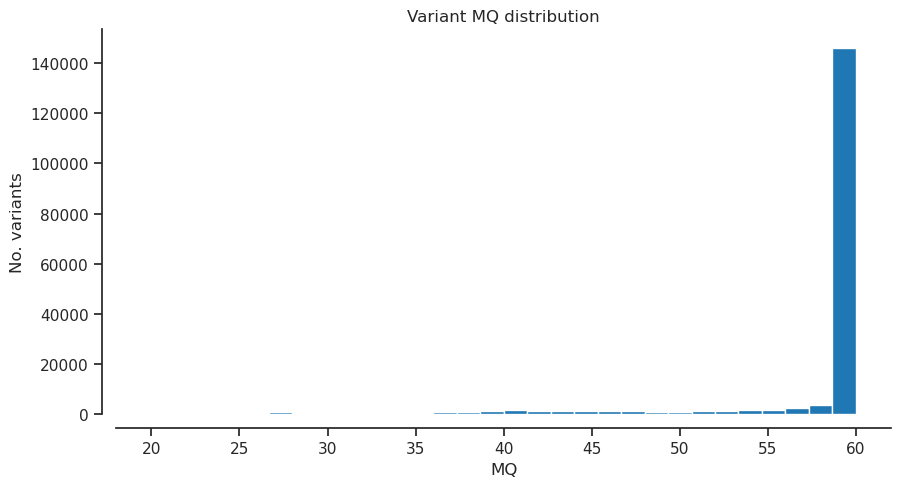

In [13]:
plot_hist('MQ','var') # RMS mapping quality

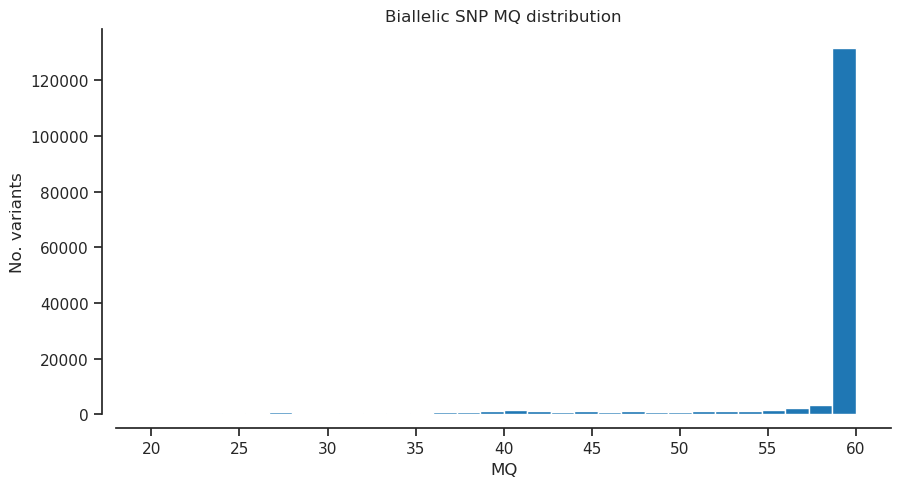

In [14]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [15]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

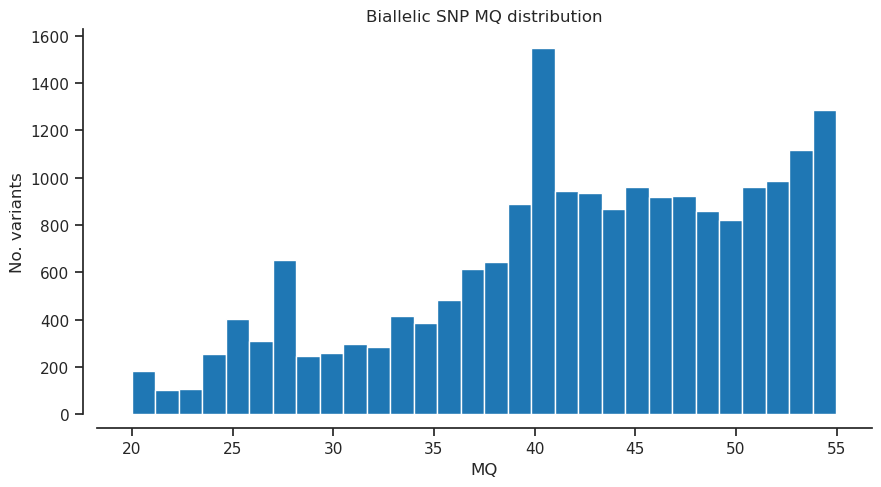

In [16]:
plot_hist('MQ')

In [17]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

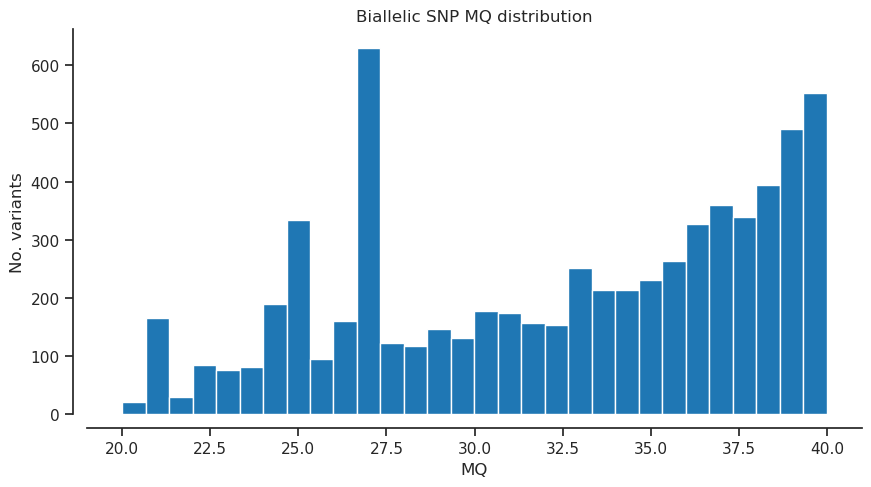

In [18]:
plot_hist('MQ')

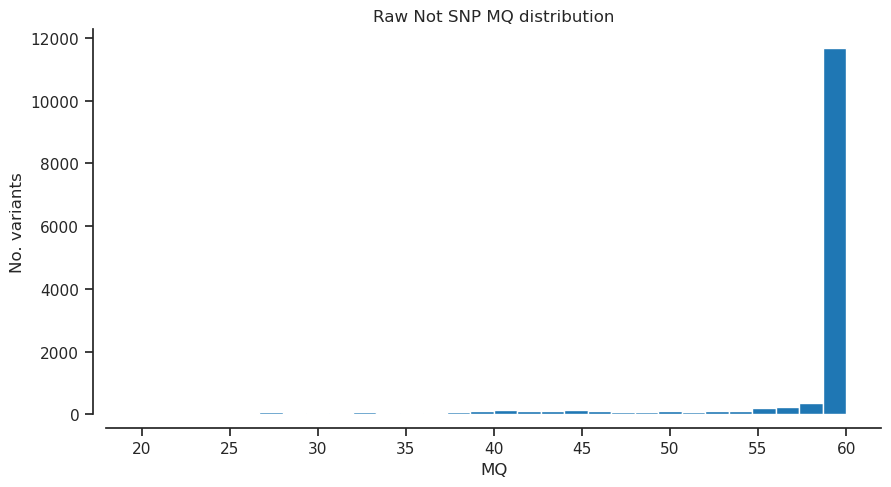

In [19]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

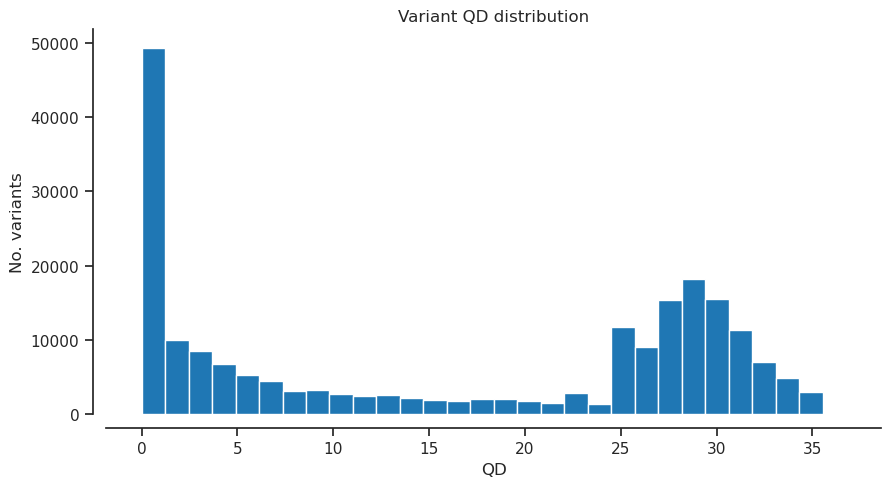

In [20]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

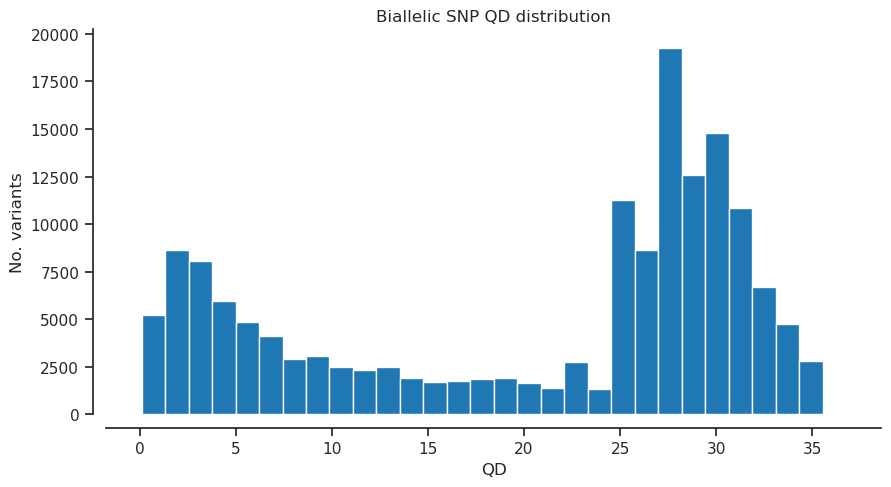

In [21]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [22]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

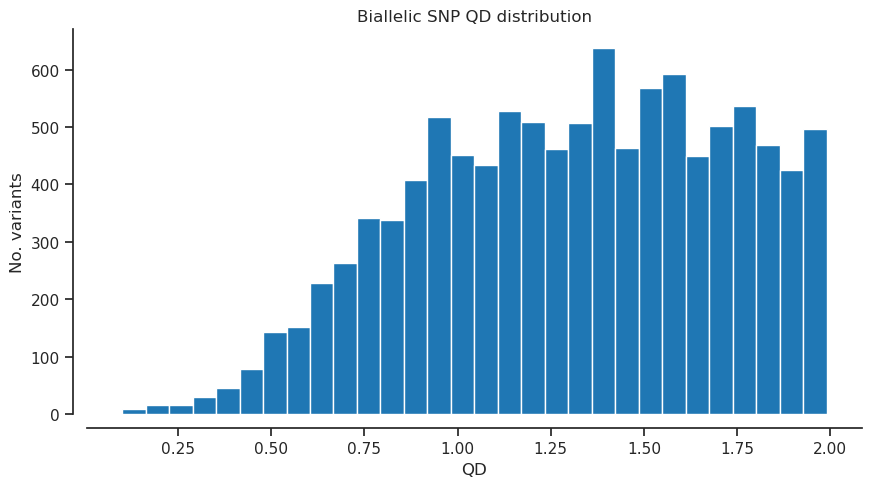

In [23]:
plot_hist('QD')

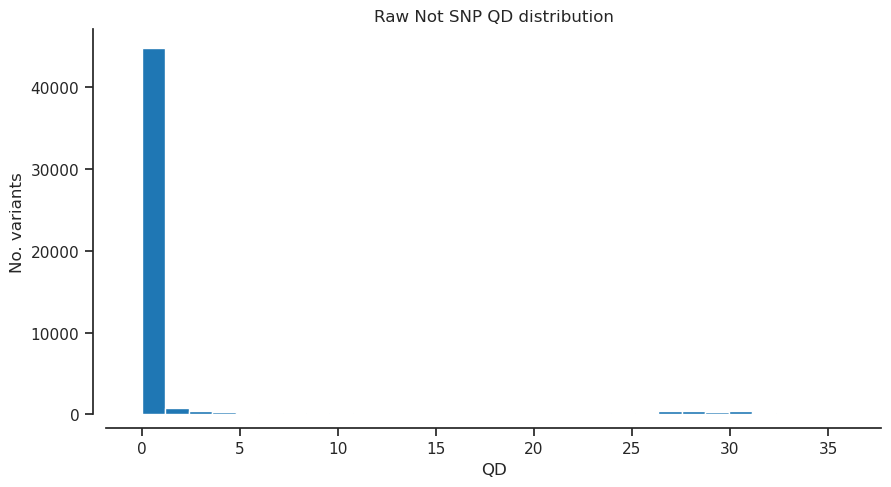

In [24]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

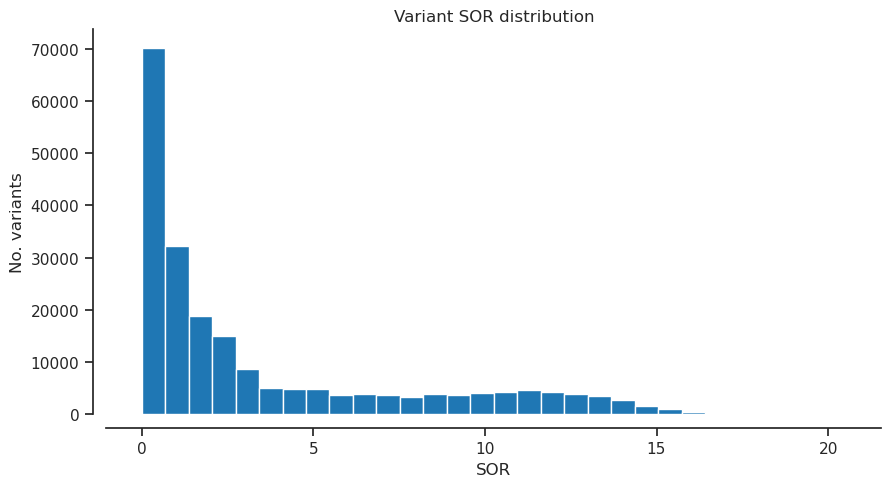

In [25]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

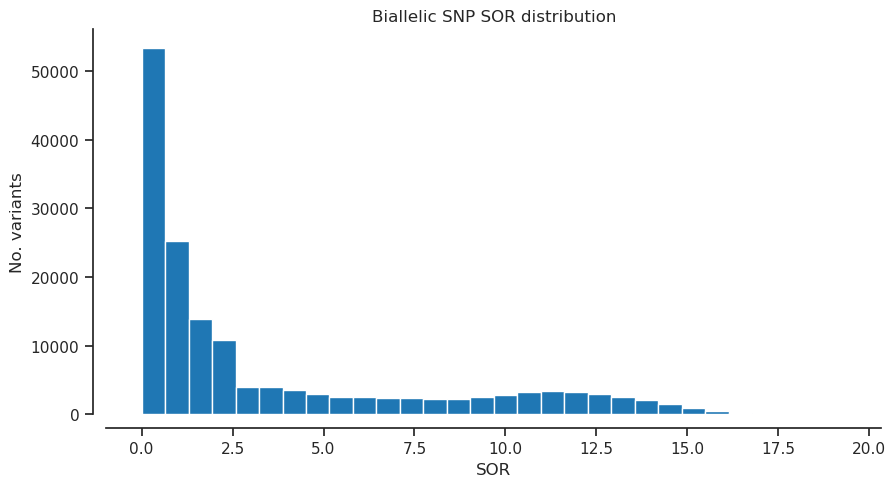

In [26]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [27]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

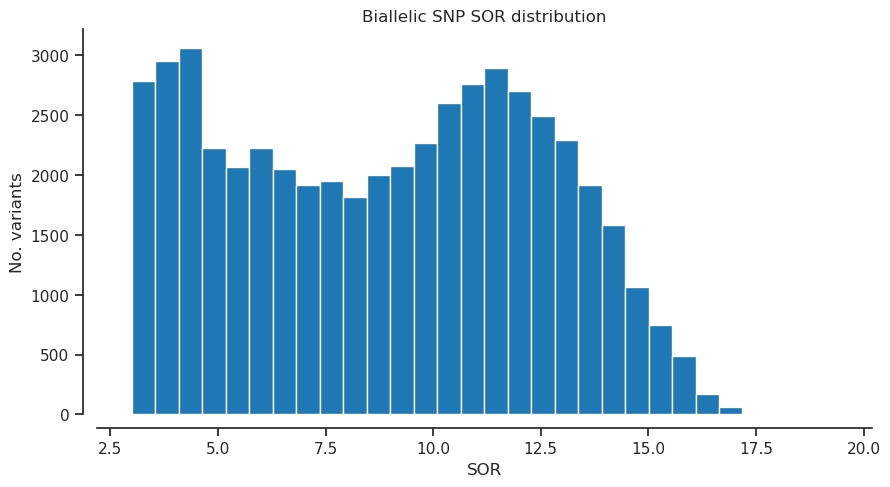

In [28]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

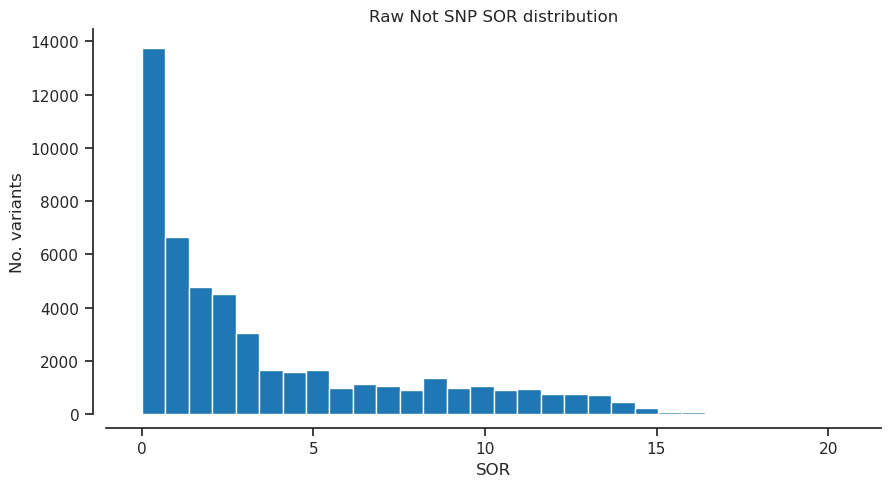

In [29]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

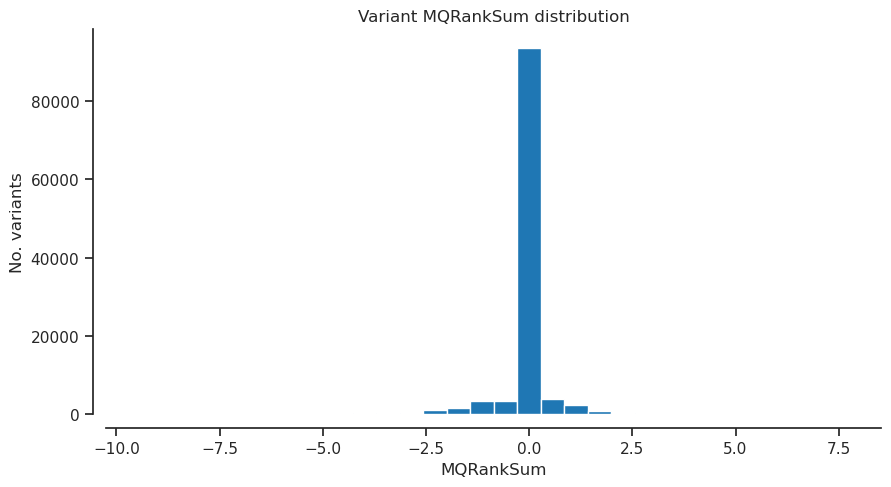

In [30]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

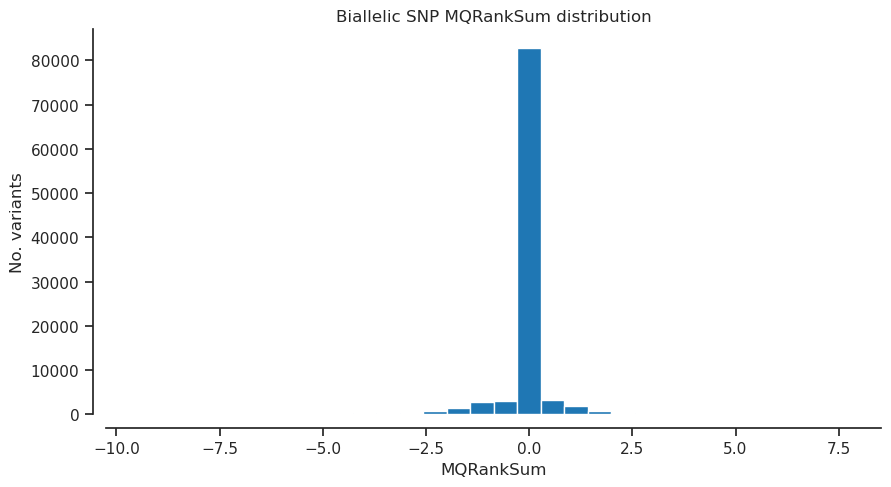

In [31]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [32]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

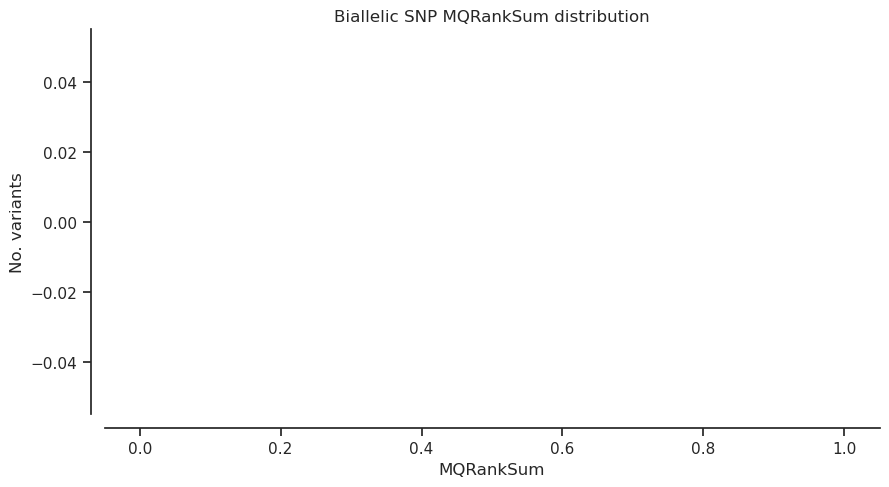

In [33]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

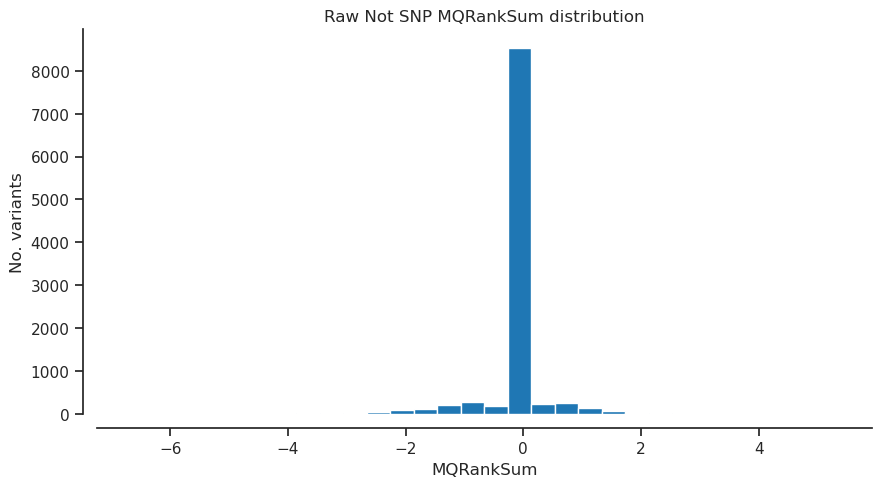

In [34]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

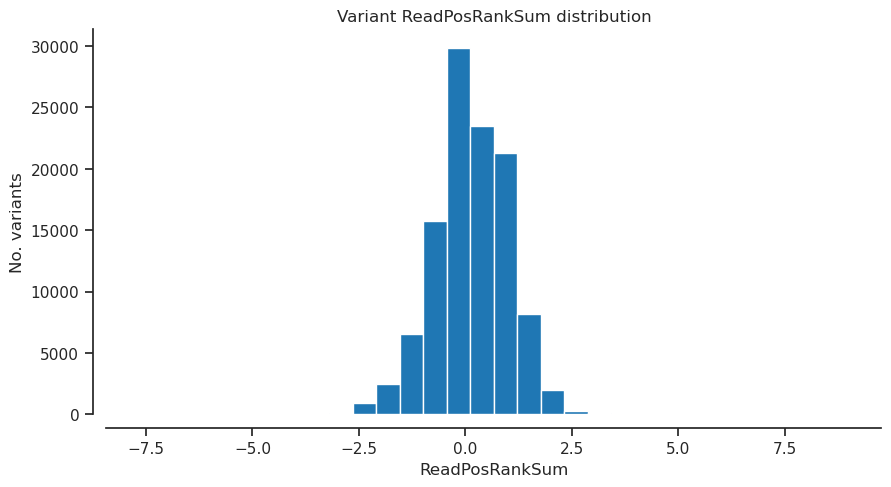

In [35]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

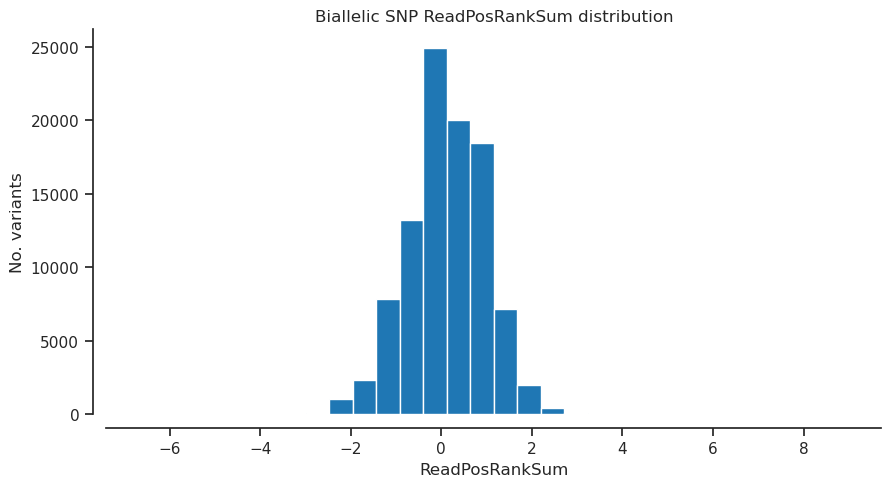

In [36]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

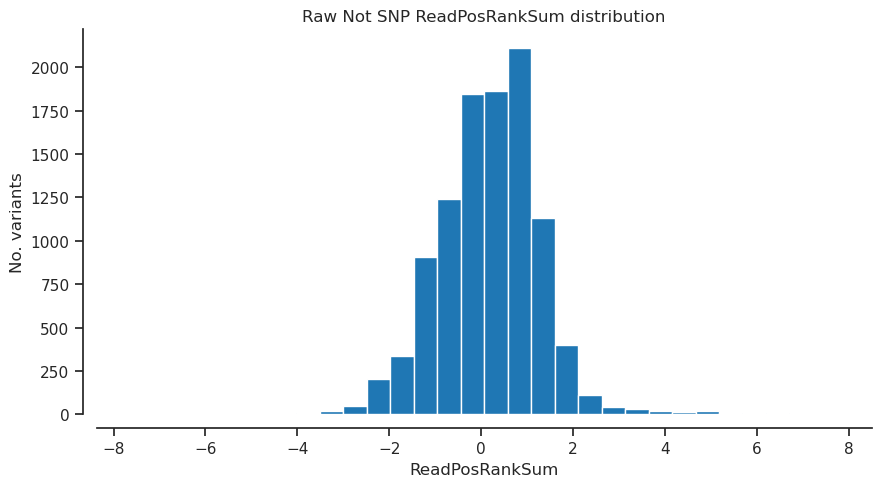

In [37]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

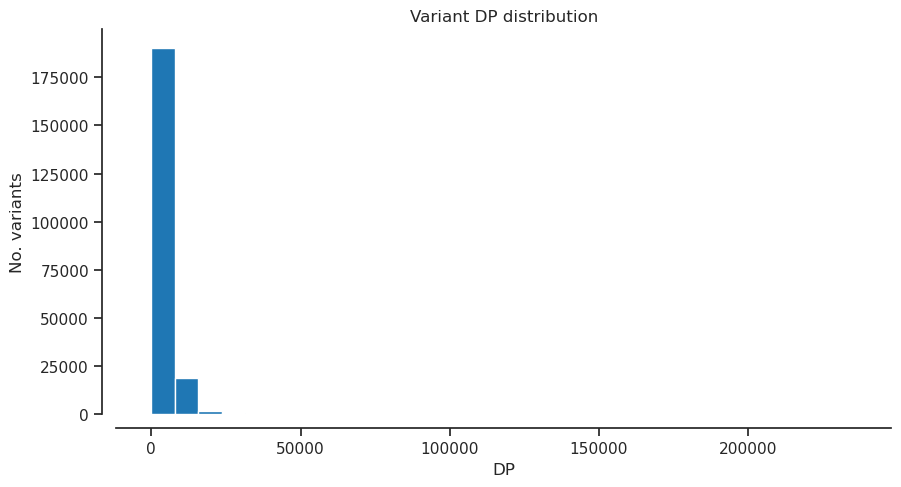

In [38]:
plot_hist('DP','var')

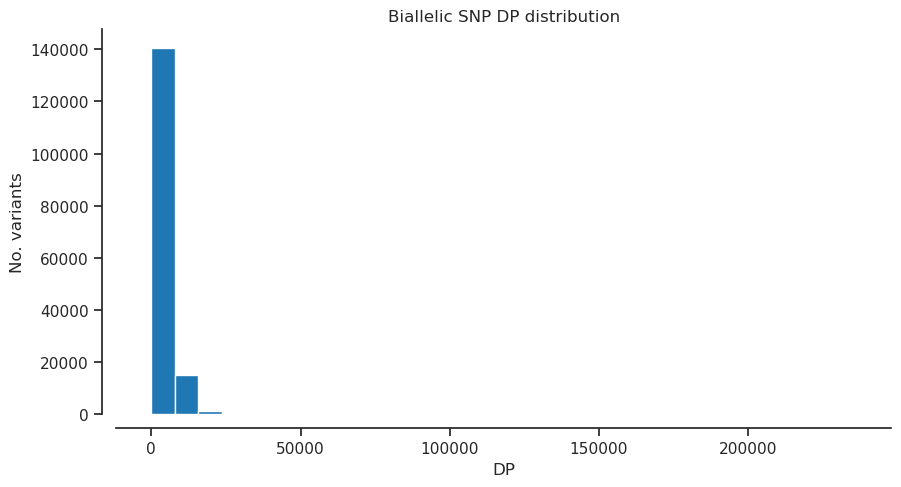

In [39]:
plot_hist('DP','biallelic')

In [40]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

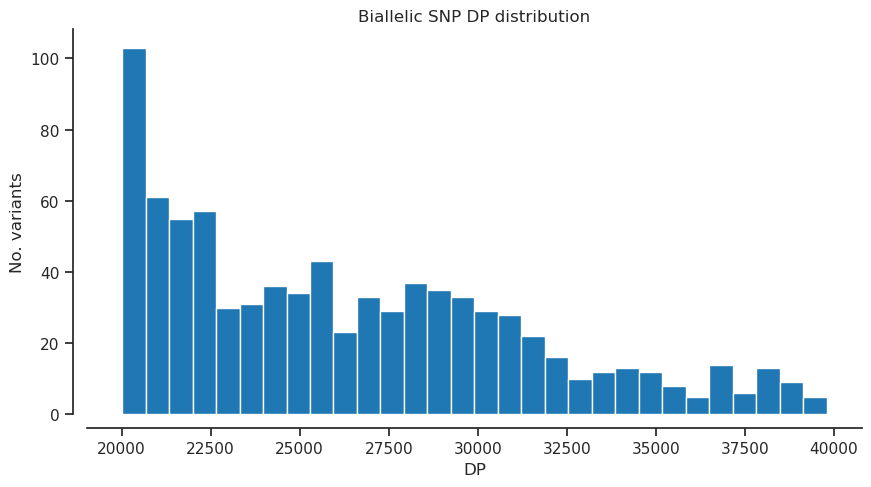

In [41]:
plot_hist('DP')

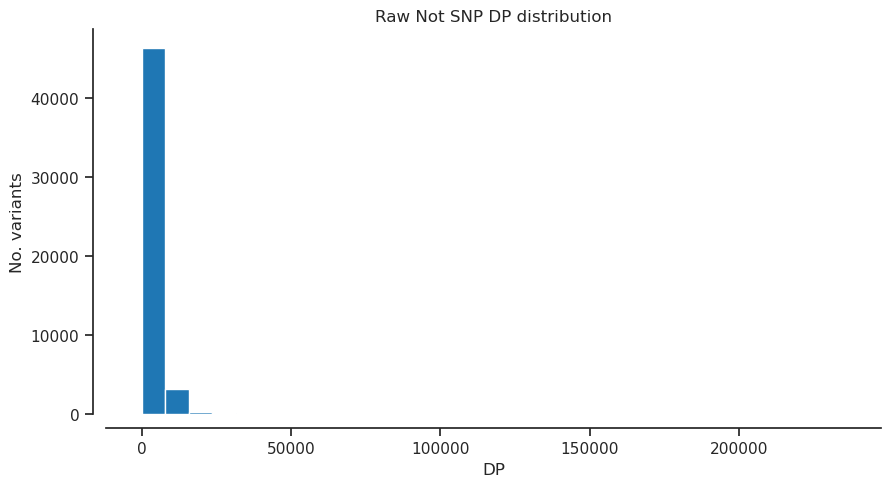

In [42]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

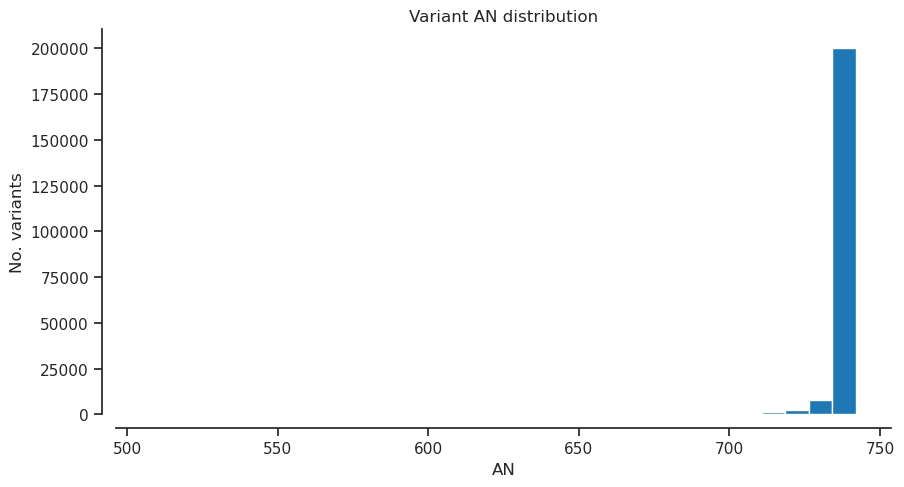

In [43]:
plot_hist('AN','var') # Total number of alleles in called genotypes

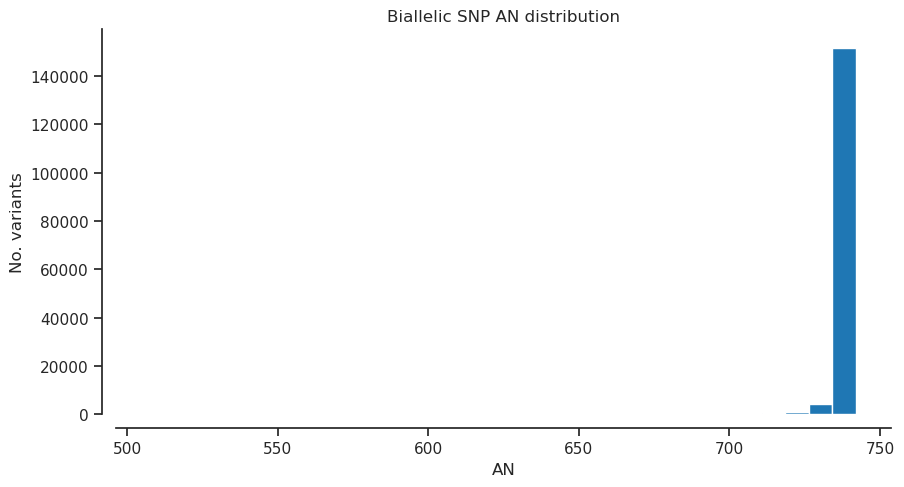

In [44]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

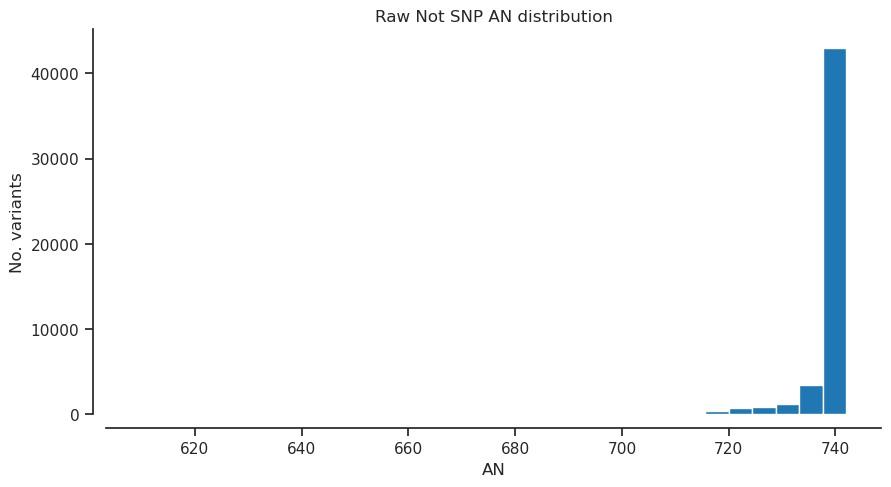

In [45]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [46]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

87121

## Genotype

In [47]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [48]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(212695, 371, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=150.5M cbytes=8.3M cratio=18.2
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [49]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(87121, 371, 2) dtype=int8 chunks=(1362, 371, 2)
   nbytes=61.6M cbytes=6.1M cratio=10.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [50]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(87121, 4) dtype=int32 chunks=(21781, 4)
   nbytes=1.3M cbytes=268.7K cratio=5.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [51]:
ac[:]

<AlleleCountsArray shape=(87121, 4) dtype=int32>
740   2   0   0
740   2   0   0
739   3   0   0
...
740   2   0   0
741   1   0   0
741   1   0   0

In [52]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[740,   2],
       [740,   2],
       [739,   3],
       ...,
       [740,   2],
       [741,   1],
       [741,   1]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

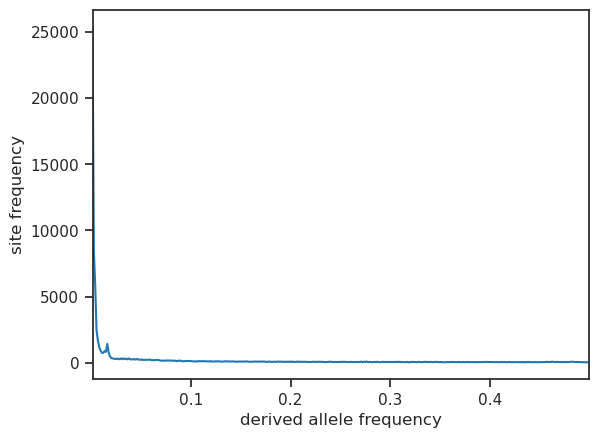

In [53]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [54]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(87121,) dtype=bool chunks=(87121,)
   nbytes=85.1K cbytes=11.3K cratio=7.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [55]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(84345, 371, 2) dtype=int8 chunks=(1318, 371, 2)
   nbytes=59.7M cbytes=5.8M cratio=10.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [56]:
n_variants = len(gt_biallelic)
n_variants

84345

In [57]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [58]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'ESP00057-001',
 b'ESP00057-002',
 b'ESP00057-003',
 b'ESP00057-004',
 b'ESP00057-005',
 b'ESP00057-006',
 b'ESP00057-007',
 b'ESP00057-008',
 b'ESP00057-009',
 b'ESP00057-010',
 b'ESP00057-011',
 b'ESP00057-012',
 b'ESP00057-013',
 b'ESP00057-014',
 b'ESP00057-015',
 b'ESP00057-016',
 b'ESP00057-017',
 b'ESP00057-018',
 b'ESP00057-019',
 b'ESP00057-020',
 b'ESP00057-021',
 b'ESP00057-023',
 b'ESP00057-024',
 b'ESP00057-025',
 b'ESP00091-001',
 b'ESP00091-002',
 b'ESP00091-003',
 b'ESP00091-004',
 b'ESP00091-005',
 b'ESP00091-006',
 b'ESP00091-007',
 b'ESP00091-008',
 b'ESP00091-009',
 b'ESP00091-010',
 b'ESP00091-011',
 b'ESP00091-012',
 b'ESP00091-013',
 b'ESP00091-014',
 b'ESP00091-015',
 b'ESP00091-016',
 b'ESP00091-017',
 b'ESP00091-018',
 b'ESP00091-019',
 b'ESP00091-020',
 b'ESP00091-022',
 b'ESP00091-023',
 b'ESP00091-024',
 b'ESP00091-025',
 b'ESP00094-001',
 b'ESP00094-002',
 b'ESP00094-003',
 b'ESP00094-004',
 b'ESP00094-005',
 b'ESP00094-006',
 b'ESP00094-007',
 b'ESP0009

In [59]:
samples_fn = '~/scratch/data/Phalepensis/Pinus_halepensis_sample_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,ESP00057-001,ESP00057
1,ESP00057-002,ESP00057
2,ESP00057-003,ESP00057
3,ESP00057-004,ESP00057
4,ESP00057-005,ESP00057
...,...,...
366,ITA00270-021,ITA00270
367,ITA00270-022,ITA00270
368,ITA00270-023,ITA00270
369,ITA00270-024,ITA00270


In [60]:
samples.Population.value_counts()

Population
ITA00025    25
ESP00166    25
ESP00106    25
ITA00076    25
ITA00075    25
ITA00046    25
ITA00027    25
ITA00133    25
ITA00165    25
ITA00261    25
ITA00270    25
ESP00377    24
ESP00057    24
ESP00091    24
ESP00094    24
Name: count, dtype: int64

In [61]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['ESP00057', 'ESP00091', 'ESP00094', 'ESP00106', 'ESP00166',
       'ESP00377', 'ITA00025', 'ITA00027', 'ITA00046', 'ITA00075',
       'ITA00076', 'ITA00133', 'ITA00165', 'ITA00261', 'ITA00270'],
      dtype=object)

## Gt frequency function

In [64]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 15)
    pop2color = {'ESP00057': palette[0],
                 'ESP00091': palette[8],
                 'ESP00094': palette[1],
                 'ESP00106': palette[9],
                 'ESP00166': palette[2],
                 'ESP00377': palette[10],
                 'ITA00025': palette[3],
                 'ITA00027': palette[11],
                 'ITA00046': palette[4],
                 'ITA00075': palette[12],
                 'ITA00076': palette[5],
                 'ITA00133': palette[13],
                 'ITA00165': palette[6],
                 'ITA00261': palette[14],
                 'ITA00270': palette[7]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[7])]
    ax.legend(handles=handles, labels=['ESP00057', 'ESP00091', 'ESP00094', 'ESP00106', 'ESP00166',
       'ESP00377', 'ITA00025', 'ITA00027', 'ITA00046', 'ITA00075',
       'ITA00076', 'ITA00133', 'ITA00165', 'ITA00261', 'ITA00270'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

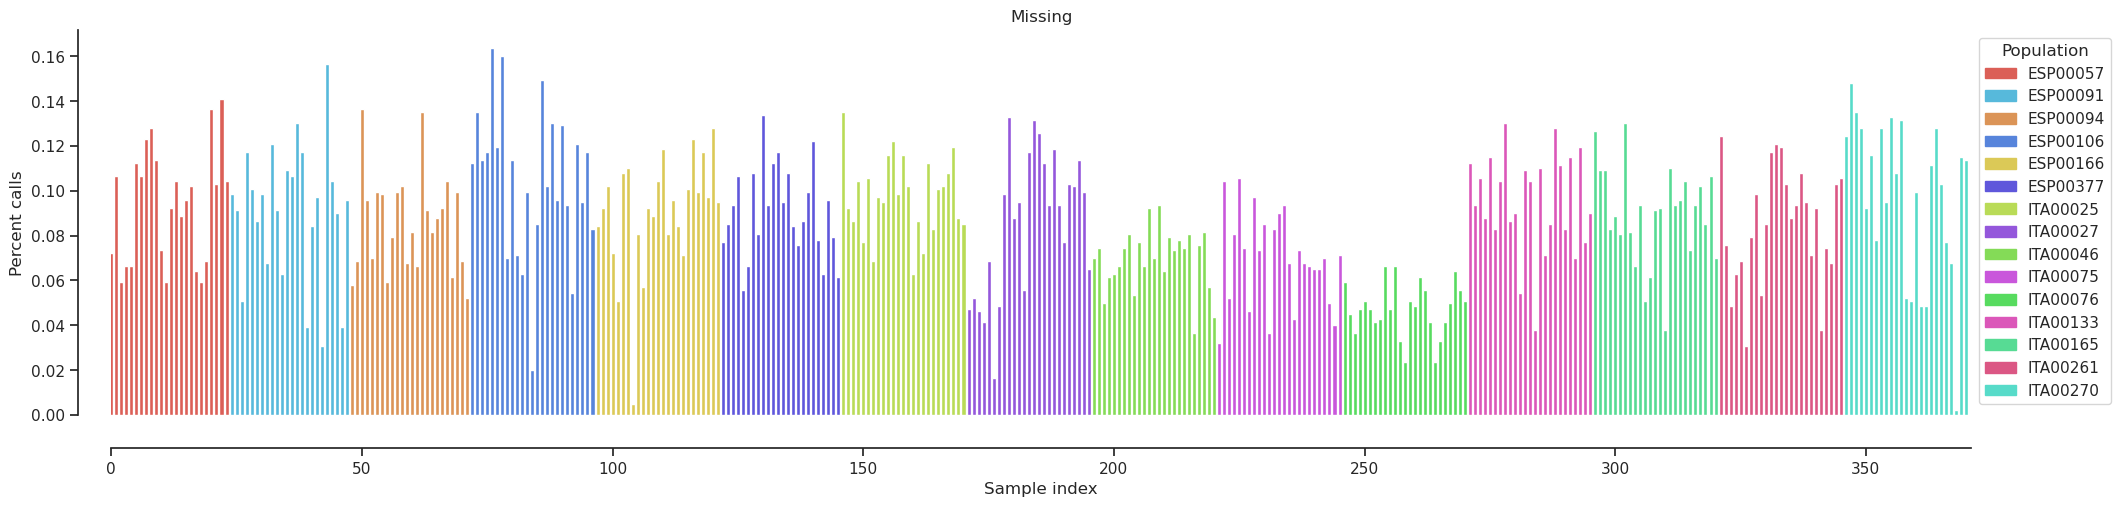

In [65]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

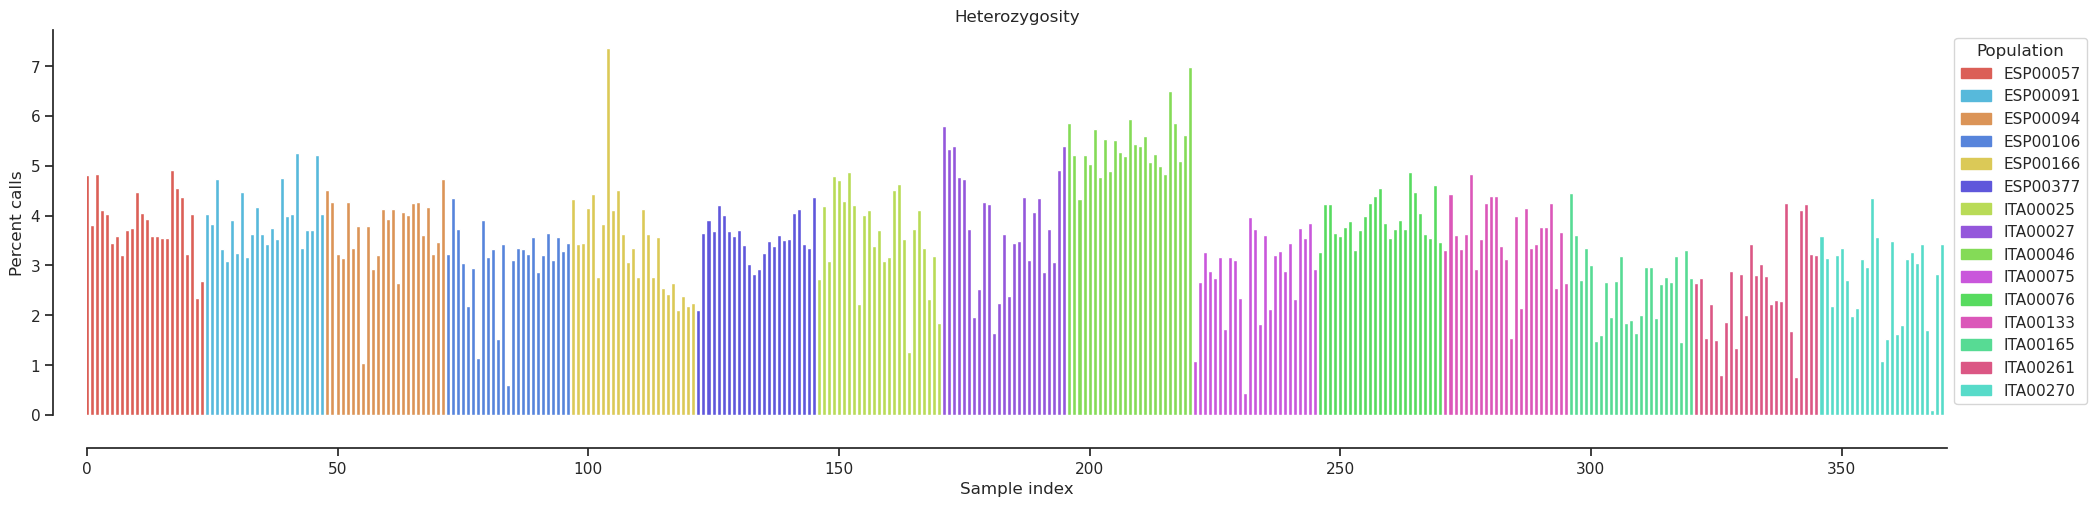

In [66]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [68]:
palette = sns.color_palette("hls",15)
pop_colours = {    
                'ESP00057': palette[0],
                 'ESP00091': palette[8],
                 'ESP00094': palette[1],
                 'ESP00106': palette[9],
                 'ESP00166': palette[2],
                 'ESP00377': palette[10],
                 'ITA00025': palette[3],
                 'ITA00027': palette[11],
                 'ITA00046': palette[4],
                 'ITA00075': palette[12],
                 'ITA00076': palette[5],
                 'ITA00133': palette[13],
                 'ITA00165': palette[6],
                 'ITA00261': palette[14],
                 'ITA00270': palette[7]
}

In [69]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [70]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(84345, 2) dtype=int32 chunks=(42173, 2)
   nbytes=658.9K cbytes=197.4K cratio=3.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [71]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(58928, 371) dtype=int8 chunks=(1842, 371)
   nbytes=20.8M cbytes=3.9M cratio=5.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [72]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

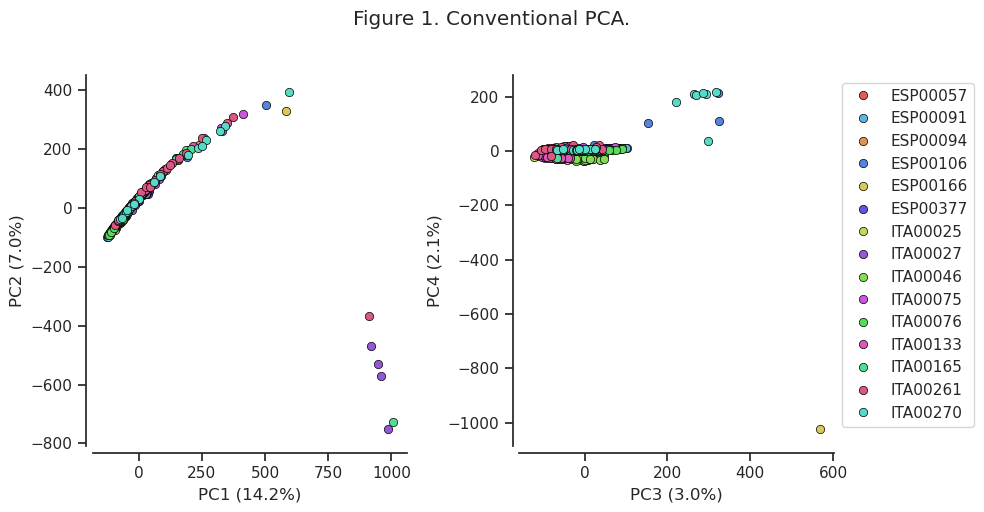

In [73]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [74]:
weirdos = coords1[:,2]>500
samples[weirdos]

,ID,Population
104,ESP00166-008,ESP00166


In [75]:
pc_het[weirdos]

array([7.36024661])

In [76]:
pc_missing[weirdos]

array([0.00474243])

In [77]:
weirdos2 = coords1[:,1]<-300
samples[weirdos2]


,ID,Population
176,ITA00027-006,ITA00027
177,ITA00027-007,ITA00027
181,ITA00027-011,ITA00027
182,ITA00027-012,ITA00027
320,ITA00165-025,ITA00165
323,ITA00261-003,ITA00261


In [78]:
weirdos3 = coords1[:,1]<-700
samples[weirdos3]

,ID,Population
176,ITA00027-006,ITA00027
320,ITA00165-025,ITA00165


In [79]:
pc_het[weirdos2]

array([3.73347561, 1.96217915, 1.65155018, 2.25620962, 2.75416444,
       1.55314482])

In [80]:
pc_missing[weirdos2]

array([0.01659849, 0.04860988, 0.09484854, 0.05572352, 0.0699508 ,
       0.04860988])

In [81]:
pc_het[weirdos3]

array([3.73347561, 2.75416444])

In [82]:
pc_missing[weirdos3]

array([0.01659849, 0.0699508 ])

In [83]:
coords1[323]

array([ 9.1116418e+02, -3.6735449e+02, -2.7487478e+01,  2.3352139e+01,
        3.2546886e+01,  1.3368362e+02,  4.4097351e+01,  5.9502289e+02,
       -2.2757989e-01,  3.3078189e+02], dtype=float32)

In [84]:
coords1[320]

array([ 1.0059885e+03, -7.2601581e+02, -5.9366253e+01,  9.1340218e+00,
       -1.0663336e+01, -9.4203011e+01, -8.9557725e-01, -2.6242108e+02,
        6.1044697e+01,  2.8970868e+02], dtype=float32)

In [85]:
coords1[182]

array([ 957.2276   , -571.38837  ,  -49.857384 ,   17.57669  ,
          1.9413402,  -18.343372 ,  -11.991859 ,  -30.981314 ,
        -35.495697 , -221.56584  ], dtype=float32)